# ATTACHING MAIN PACKAGES

In [1]:
import os
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")       # optional aesthetics
%matplotlib inline 

# READING THE DATA

In [2]:
data_path = "C:\\Users\\dimet\\OneDrive - NOVAIMS\\NOVA IMS BDMWDS\\0 Data"

In [3]:
# Function to load each Excel file into its own DataFrame
def load_excel_dataframe(filename: str, sheet_name: str) -> pd.DataFrame:
    """
    Load a sheet from an Excel file into a pandas DataFrame.
    Prints the shape on success or an error message on failure.
    """
    file_path = os.path.join(data_path, filename)
    try:
        df = pd.read_excel(file_path, sheet_name=sheet_name)
        print(f"Loaded '{sheet_name}' from '{filename}' (shape: {df.shape})")
        return df
    except Exception as e:
        print(f"Error loading '{sheet_name}' from '{filename}': {e}")
        return pd.DataFrame()

In [4]:
# Load DataFrames
df = load_excel_dataframe("Regional.xlsx", "regional_data")

Loaded 'regional_data' from 'Regional.xlsx' (shape: (15539, 34))


# 1. Quick first look 

In [5]:
print("Shape:", df.shape)
display(df.head())
display(df.tail())

Shape: (15539, 34)


,zipcode_link,zip4,PROVINCE,URB,INCOME,SOCCL_A,SOCCL_B1,SOCCL_B2,SOCCL_C,SOCCL_D,...,FAM_CHILD_Y,FAM_CHILD_O,FAM_WCHILD_Y,FAM_WCHILD_MED,FAM_WCHILD_OLD,CIT_HOUSEHOLD,LOAN,SAVINGS,SHOP_ONLINE,CAR
0,22282,1011,North Holland,1,1.0,5.0,2.0,2.0,1.0,1.0,...,3.0,2.0,1.0,2.0,3.0,3.0,4.0,4.0,5.0,2.0
1,10026,1011,North Holland,1,3.0,1.0,3.0,4.0,1.0,1.0,...,2.0,3.0,1.0,1.0,3.0,2.0,1.0,4.0,3.0,1.0
2,18907,1012,North Holland,1,1.0,4.0,2.0,2.0,2.0,1.0,...,2.0,1.0,3.0,2.0,1.0,2.0,4.0,6.0,6.0,1.0
3,18558,1012,North Holland,1,2.0,4.0,3.0,1.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,4.0,6.0,6.0,1.0
4,22808,1012,North Holland,1,2.0,2.0,3.0,3.0,2.0,1.0,...,1.0,1.0,2.0,1.0,2.0,1.0,4.0,6.0,6.0,1.0


,zipcode_link,zip4,PROVINCE,URB,INCOME,SOCCL_A,SOCCL_B1,SOCCL_B2,SOCCL_C,SOCCL_D,...,FAM_CHILD_Y,FAM_CHILD_O,FAM_WCHILD_Y,FAM_WCHILD_MED,FAM_WCHILD_OLD,CIT_HOUSEHOLD,LOAN,SAVINGS,SHOP_ONLINE,CAR
15534,21354,9989,Groningen,7,3.0,2.0,1.0,3.0,3.0,3.0,...,3.0,1.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
15535,10202,9989,Groningen,7,3.0,1.0,3.0,4.0,2.0,1.0,...,3.0,4.0,1.0,3.0,3.0,5.0,1.0,6.0,4.0,4.0
15536,15267,9989,Groningen,7,3.0,1.0,2.0,4.0,2.0,1.0,...,4.0,2.0,1.0,2.0,4.0,5.0,4.0,5.0,5.0,5.0
15537,15404,9991,Groningen,7,5.0,1.0,1.0,3.0,1.0,4.0,...,3.0,3.0,1.0,2.0,2.0,4.0,2.0,3.0,2.0,3.0
15538,22552,9994,Groningen,7,2.0,3.0,4.0,2.0,1.0,1.0,...,1.0,4.0,1.0,3.0,4.0,4.0,3.0,4.0,5.0,5.0


# 2. Metadata & basic hygiene 

In [6]:
# 2‑a) Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15539 entries, 0 to 15538
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   zipcode_link    15539 non-null  int64  
 1   zip4            15539 non-null  int64  
 2   PROVINCE        15539 non-null  object 
 3   URB             15539 non-null  int64  
 4   INCOME          14659 non-null  float64
 5   SOCCL_A         15471 non-null  float64
 6   SOCCL_B1        15471 non-null  float64
 7   SOCCL_B2        15471 non-null  float64
 8   SOCCL_C         15471 non-null  float64
 9   SOCCL_D         15471 non-null  float64
 10  EDU_HIGH        15471 non-null  float64
 11  EDU_MID         15471 non-null  float64
 12  EDU_LOW         15471 non-null  float64
 13  DINK            15471 non-null  float64
 14  OWN_HOUSE       15452 non-null  float64
 15  AVG_HOUSE       15367 non-null  float64
 16  RENT_PRICE      5742 non-null   float64
 17  STAGE_OF_LIFE   15436 non-null 

In [7]:
# 2‑b) Missing‑value profile
missings = df.isna().sum().sort_values(ascending=False)
display(missings[missings > 0])

RENT_PRICE        9797
INCOME             880
AVG_HOUSE          172
STAGE_OF_LIFE      103
OWN_HOUSE           87
CIT_HOUSEHOLD       71
FAM_CHILD_Y         68
SINGLES_YOUNG       68
SINGLES_MID         68
SINGLES_OLD         68
FAM_WCHILD_Y        68
FAM_CHILD_O         68
FAM                 68
FAM_WCHILD_MED      68
FAM_WCHILD_OLD      68
LOAN                68
SAVINGS             68
SHOP_ONLINE         68
FAM_WCHILD          68
CAR                 68
SINGLE              68
DINK                68
EDU_LOW             68
EDU_MID             68
EDU_HIGH            68
SOCCL_D             68
SOCCL_C             68
SOCCL_B2            68
SOCCL_B1            68
SOCCL_A             68
dtype: int64

In [8]:
# 2‑c) Duplicate rows
dup_count = df.duplicated().sum()
print(f"Duplicate rows: {dup_count}")

Duplicate rows: 0


# 3. Summary statistics

In [9]:
# 3‑a) Numeric variables
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
zipcode_link,15539.0,17816.741103,4502.523456,10000.0,13919.5,17822.0,21714.5,25609.0
zip4,15539.0,4620.574040,2426.697283,1011.0,2685.0,3891.0,6833.0,9994.0
URB,15539.0,3.692387,1.878735,1.0,2.0,4.0,5.0,7.0
INCOME,14659.0,2.920322,1.370830,1.0,2.0,3.0,4.0,6.0
SOCCL_A,15471.0,2.521363,1.471529,1.0,1.0,2.0,4.0,5.0
SOCCL_B1,15471.0,2.547088,1.093834,1.0,2.0,3.0,3.0,5.0
SOCCL_B2,15471.0,2.385495,1.009551,1.0,2.0,2.0,3.0,5.0
SOCCL_C,15471.0,1.661237,0.861199,1.0,1.0,1.0,2.0,5.0
SOCCL_D,15471.0,1.469524,0.839374,1.0,1.0,1.0,2.0,5.0
EDU_HIGH,15471.0,2.721931,1.440879,1.0,2.0,2.0,4.0,5.0


In [10]:
# 3‑b) Categorical variables (top‑10 value counts each)
cat_cols = df.select_dtypes(include=["object", "category"]).columns
for c in cat_cols:
    print(f"\n--- {c} ---")
    display(df[c].value_counts(dropna=False).head(10))


--- PROVINCE ---


PROVINCE
South Holland    4329
Gelderland       2547
North Holland    2137
Overijssel       1445
North Brabant    1415
Utrecht          1328
Limburg           705
Groningen         574
Flevoland         376
Friesland         255
Name: count, dtype: int64

# 4. Target variable & funnel conversion checks

# 5. Univariate distributions

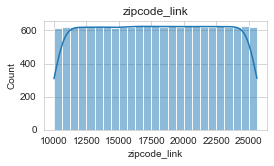

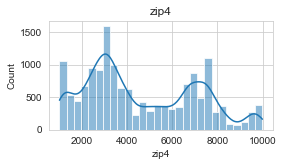

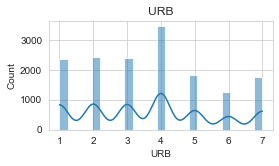

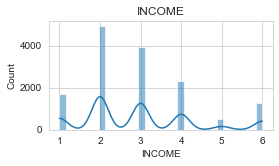

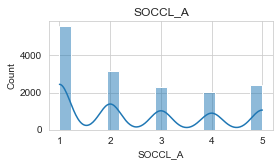

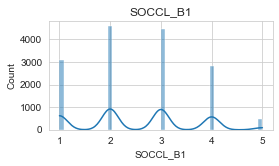

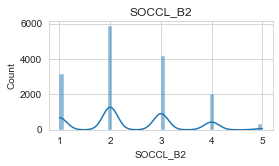

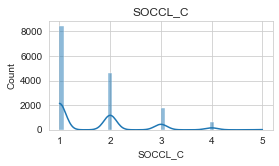

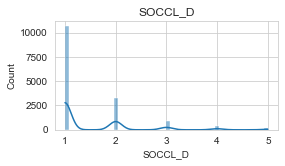

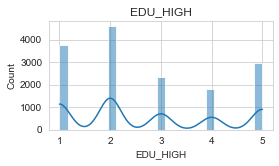

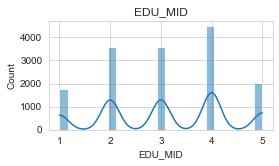

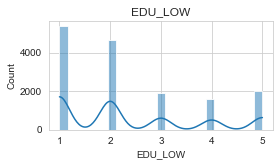

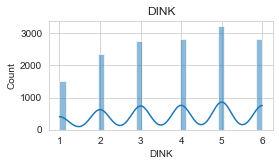

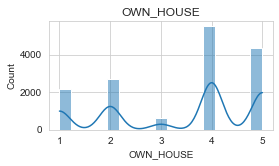

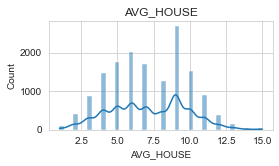

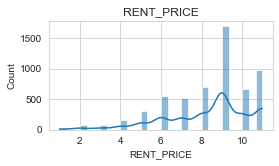

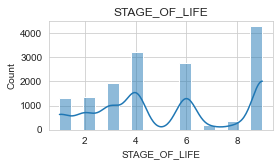

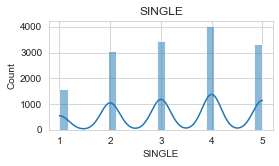

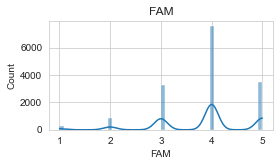

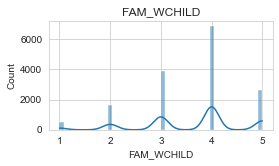

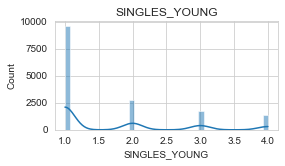

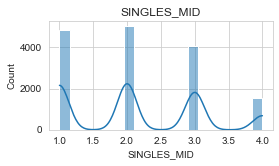

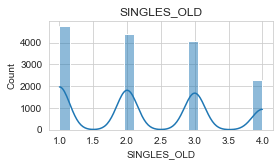

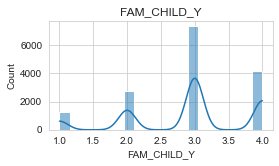

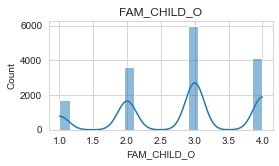

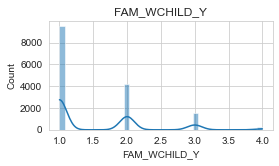

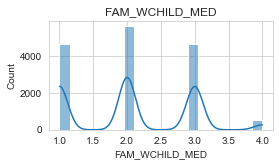

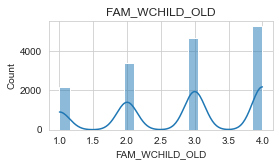

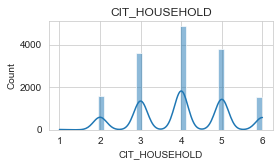

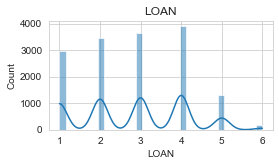

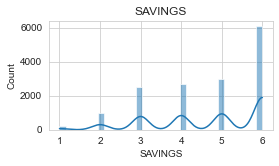

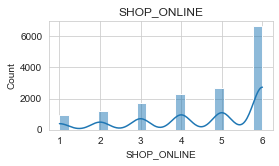

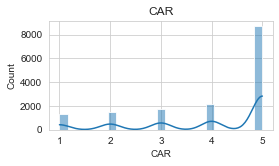

In [12]:
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    plt.figure(figsize=(4,2))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(col)
    plt.show()

# 6. Bivariate relationships

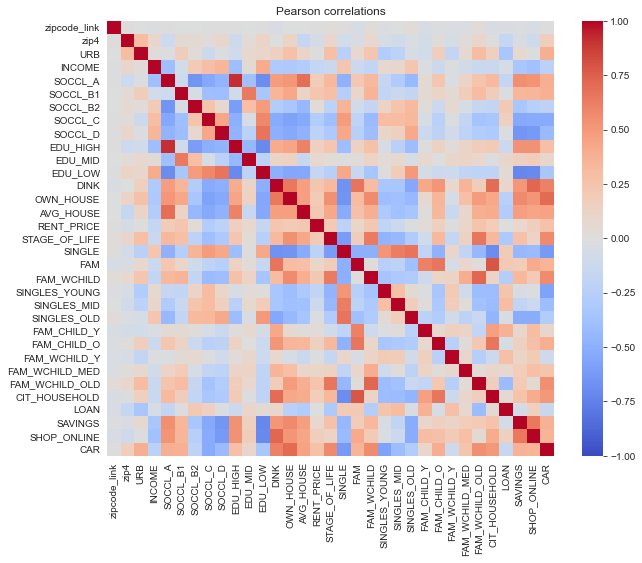

In [13]:
# 6‑a) Correlation heat‑map for numerics
plt.figure(figsize=(10,8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=False, cmap="coolwarm", vmax=1, vmin=-1)
plt.title("Pearson correlations")
plt.show()

# 7. Categorical vs. target